<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transfomer_encoder_with_temporal_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.4.1.zip -O master.zip

--2024-10-23 04:27:31--  https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.4.1.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.4.1 [following]
--2024-10-23 04:27:32--  https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.4.1
Resolving codeload.github.com (codeload.github.com)... 140.82.116.9
Connecting to codeload.github.com (codeload.github.com)|140.82.116.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ]  76.64M  18.9MB/s    in 4.1s    

2024-10-23 04:27:36 (18.9 MB/s) - ‘master.zip’ saved [80365125]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
ab8d10d4e0745f02a625f681f21bd5f5d0038f10
   creating: master/trado_samples-0.4.1/
  inflating: master/trado_samples-0.4.1/.gitignore  
  inflating: master/trado_samples-0.4.1/LICENSE  
  inflating: master/trado_samples-0.4.1/README.md  
   creating: master/trado_samples-0.4.1/colab_files/
 extracting: master/trado_samples-0.4.1/colab_files/.gitkeep  
  inflating: master/trado_samples-0.4.1/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-0.4.1/colab_files/exp_track_affi

In [ ]:
!mv master/trado_samples-0.4.1/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
import collections
import copy
import json
import math
import os
import sys
from functools import partial
from pathlib import Path

# Third party's modules
import numpy as np

from pydantic import (
    BaseModel,
    ConfigDict,
    Field)

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks,
    get_fullbody_swappairs
)
from modules_gislr.layers.misc import (
    GPoolRecognitionHeadSettings,
    Identity,
    Zero,
    apply_norm,
    create_norm
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    RandomAffineTransform2D,
    RandomClip,
    RandomDropParts,
    RandomHorizontalFlip,
    RandomNoise,
    RandomTimeWarping,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)
from modules_gislr.utils import (
    make_causal_mask,
    make_san_mask,
    select_reluwise_activation
)

# 3. Implement feature extraction module

### Configured Pydantic model

In [ ]:
class ConfiguredModel(BaseModel):
    model_config = ConfigDict(extra="forbid")

### Linear feature extraction

In [ ]:
class LinearFeatureExtractorSettings(ConfiguredModel):
    fext_type: str = "linear"
    in_channels: int = 64
    out_channels: int = 64
    norm_type: str = Field(default="batch", pattern=r"batch|layer")
    norm_eps: float = 1e-5
    activation: str = Field(default="relu",
        pattern=r"relu|gelu|swish|silu|mish|geluacc|tanhexp")
    add_bias: bool = True
    dropout: float = 0.1
    channel_first: bool = True
    add_residual: bool = True

    def build_layer(self):
        return LinearFeatureExtractor(self)

In [ ]:
class LinearFeatureExtractor(nn.Module):
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, LinearFeatureExtractorSettings)
        self.settings = settings
        self.channel_first = settings.channel_first

        self.linear = nn.Linear(
            in_features=settings.in_channels,
            out_features=settings.out_channels,
            bias=settings.add_bias)

        self.norm = create_norm(
            settings.norm_type, settings.out_channels, settings.norm_eps,
            settings.add_bias)

        self.activation = select_reluwise_activation(settings.activation)

        self.dropout = nn.Dropout(p=settings.dropout)

        if settings.add_residual and settings.in_channels == settings.out_channels:
            self.residual = Identity()
        else:
            self.residual = Zero()

    def forward(self,
                feature):
        shape = feature.shape
        if self.channel_first:
            # `[N, C, T] -> [N, T, C]`
            if len(shape) == 3:
                feature = feature.permute([0, 2, 1])
            # `[N, C, T, *] -> [N, T, C, *] -> [N, T, C']`
            elif len(shape) == 4:
                feature = feature.permute([0, 2, 1, 3])
                feature = feature.reshape([shape[0], shape[2], -1])
            # `[N, C, T, *, *] -> [N, T, C, *, *] -> [N, T, C']`
            elif len(shape) == 5:
                feature = feature.permute([0, 2, 1, 3, 4])
                feature = feature.reshape([shape[0], shape[2], -1])
            else:
                raise NotImplementedError(f"Unsupported feature shape:{shape}.")
        res = self.residual(feature)
        feature = self.linear(feature)
        feature = apply_norm(self.norm, feature, channel_first=False)
        feature = self.activation(feature)
        feature = self.dropout(feature)
        feature = feature + res
        if self.channel_first:
            # `[N, T, C] -> [N, C, T]`
            feature = feature.permute([0, 2, 1])
        return feature

### Temporal CNN feature extraction

In [ ]:
class CNN1DFeatureExtractorSettings(ConfiguredModel):
    fext_type: str = "cnn1d"
    in_channels: int = 64
    out_channels: int = 64
    # Conv1D settings.
    kernel_size: int = Field(default=3, ge=3)
    stride: int = Field(default=1, ge=1)
    padding_mode: str = "zeros"
    norm_type: str = Field(default="batch",
        pattern=r"layer|batch")
    norm_eps: float = 1e-5
    activation: str = Field(default="swish",
        pattern=r"relu|gelu|swish|silu|mish|geluacc|tanhexp")
    causal: bool | None = False
    add_residual: bool = True
    add_bias: bool = True
    dropout: float = 0.1

    def model_post_init(self, __context):
        message = f"kernel_size:{self.kernel_size} must be the odd number."
        assert (self.kernel_size - 1) % 2 == 0, message

    def build_layer(self):
        return CNN1DFeatureExtractor(self)

In [ ]:
class CNN1DFeatureExtractor(nn.Module):
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, CNN1DFeatureExtractorSettings)
        self.settings = settings
        self.causal = settings.causal

        if settings.causal:
            self.padding = (settings.kernel_size - 1)
        else:
            self.padding = (settings.kernel_size - 1) // 2

        self.conv_module = self._build_conv_module(settings, self.padding)
        self.norm = create_norm(settings.norm_type, settings.out_channels, settings.norm_eps)
        self.activation = select_reluwise_activation(settings.activation)
        self.dropout = nn.Dropout(p=settings.dropout)

        if settings.add_residual:
            if settings.in_channels == settings.out_channels:
                if settings.stride == 1:
                    self.residual = Identity()
                else:
                    self.residual = nn.MaxPool1d(
                        kernel_size=settings.kernel_size,
                        stride=settings.stride,
                        padding=self.padding)
            else:
                self.residual = nn.Conv1d(
                    in_channels=settings.in_channels,
                    out_channels=settings.out_channels,
                    kernel_size=1,
                    stride=settings.stride)
        else:
            self.residual = Zero()


    def _build_conv_module(self, settings, padding):
        dict_modules = collections.OrderedDict([
            # Point-wise.
            ("pconv",
             nn.Conv1d(
                in_channels=settings.in_channels,
                out_channels=settings.out_channels,
                kernel_size=1,
                stride=1,
                padding=0,
                bias=settings.add_bias)),
            # Depth-wise
            ("dconv",
             nn.Conv1d(
                in_channels=settings.out_channels,
                out_channels=settings.out_channels,
                kernel_size=settings.kernel_size,
                stride=settings.stride,
                padding=padding,
                groups=settings.out_channels,
                padding_mode=settings.padding_mode,
                bias=settings.add_bias))])

        conv_module = nn.Sequential(dict_modules)
        return conv_module

    def forward(self,
                feature):
        shape = feature.shape
        if len(shape) == 4:
            # `[N, C, T, *] -> [N, C, *, T] -> [N, C', T]`
            feature = feature.permute([0, 1, 3, 2])
            feature = feature.reshape([shape[0], -1, shape[2]])
        elif len(shape) == 5:
            # `[N, C, T, *, *] -> [N, C, *, *, T] -> [N, C', T]`
            feature = feature.permute([0, 1, 3, 4, 2])
            feature = feature.reshape([shape[0], -1, shape[2]])

        res = self.residual(feature)
        feature = self.conv_module(feature)
        feature = apply_norm(self.norm, feature, channel_first=True)
        feature = self.activation(feature)
        feature = self.dropout(feature)
        feature = feature + res
        return feature

In [ ]:
def create_fext_module(settings):
    if settings is None:
        fext_module = nn.ModuleList(
            [Identity()])
    else:
        fext_module = nn.ModuleList(
            [setting.build_layer() for setting in settings])
    return fext_module

# 4. Refactor Transformer ISLR model

### Postional encoding

In [ ]:
class PositionalEncodingSettings(ConfiguredModel):
    dim_model: int = 64
    dropout: float = 0.1
    max_len: int = 5000

    def build_layer(self):
        return PositionalEncoding(self)

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, PositionalEncodingSettings)
        self.settings = settings

        self.dim_model = settings.dim_model
        # Compute the positional encodings once in log space.
        pose = torch.zeros(settings.max_len, settings.dim_model,
            dtype=torch.float32)
        position = torch.arange(0, settings.max_len,
            dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, settings.dim_model, 2).float()
                             * -(math.log(10000.0) / settings.dim_model))
        pose[:, 0::2] = torch.sin(position * div_term)
        pose[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pose", pose)

        self.dropout = nn.Dropout(p=settings.dropout)

    def forward(self,
                feature):
        feature = feature + self.pose[None, :feature.shape[1], :]
        feature = self.dropout(feature)
        return feature

### Multi-head attention

In [ ]:
class MultiheadAttentionSettings(ConfiguredModel):
    key_dim: int = 64
    query_dim: int = 64
    att_dim: int = 64
    out_dim: int = 64
    num_heads: int = 1
    dropout: float = 0.1
    add_bias: bool = True

    def build_layer(self):
        return MultiheadAttention(self)

In [ ]:
class MultiheadAttention(nn.Module):
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, MultiheadAttentionSettings)
        self.settings = settings

        assert settings.att_dim % settings.num_heads == 0
        self.head_dim = settings.att_dim // settings.num_heads
        self.num_heads = settings.num_heads
        self.scale = math.sqrt(self.head_dim)

        self.w_key = nn.Linear(settings.key_dim, settings.att_dim,
            bias=settings.add_bias)
        self.w_value = nn.Linear(settings.key_dim, settings.att_dim,
            bias=settings.add_bias)
        self.w_query = nn.Linear(settings.query_dim, settings.att_dim,
            bias=settings.add_bias)

        self.w_out = nn.Linear(settings.att_dim, settings.out_dim, bias=settings.add_bias)

        self.dropout_attn = nn.Dropout(p=settings.dropout)

        self.neg_inf = None

        self.qkv_same_dim = settings.key_dim == settings.query_dim
        self.reset_parameters(settings.add_bias)

    def reset_parameters(self, add_bias):
        """Initialize parameters with Xavier uniform distribution.

        # NOTE: For this initialization, please refer
        https://github.com/pytorch/fairseq/blob/master/fairseq/modules/multihead_attention.py  # pylint: disable=line-too-long

        """
        if self.qkv_same_dim:
            nn.init.xavier_uniform_(self.w_key.weight, gain=1 / math.sqrt(2))
            nn.init.xavier_uniform_(self.w_value.weight, gain=1 / math.sqrt(2))
            nn.init.xavier_uniform_(self.w_query.weight, gain=1 / math.sqrt(2))
        else:
            nn.init.xavier_uniform_(self.w_key.weight)
            nn.init.xavier_uniform_(self.w_value.weight)
            nn.init.xavier_uniform_(self.w_query.weight)
        nn.init.xavier_uniform_(self.w_out.weight)
        if add_bias:
            nn.init.constant_(self.w_key.bias, 0.)
            nn.init.constant_(self.w_value.bias, 0.)
            nn.init.constant_(self.w_query.bias, 0.)
            nn.init.constant_(self.w_out.bias, 0.)

    def forward(self,
                key: torch.Tensor,
                value: torch.Tensor,
                query: torch.Tensor,
                mask: torch.Tensor):
        if self.neg_inf is None:
            self.neg_inf = float(np.finfo(
                torch.tensor(0, dtype=key.dtype).numpy().dtype).min)

        bsize, klen = key.size()[: 2]
        qlen = query.size(1)

        # key: `[N, klen, kdim] -> [N, klen, adim] -> [N, klen, H, adim/H(=hdim)]`
        # value: `[N, klen, vdim] -> [N, klen, adim] -> [N, klen, H, adim/H(=hdim)]`
        # query: `[N, qlen, qdim] -> [N, qlen, adim] -> [N, qlen, H, adim/H(=hdim)]`
        key = self.w_key(key).reshape([bsize, -1, self.num_heads, self.head_dim])
        value = self.w_value(value).reshape([bsize, -1, self.num_heads, self.head_dim])
        query = self.w_query(query).reshape([bsize, -1, self.num_heads, self.head_dim])

        # qk_score: `[N, qlen, H, hdim] x [N, klen, H, hdim] -> [N, qlen, klen, H]`
        qk_score = torch.einsum("bihd,bjhd->bijh", (query, key)) / self.scale

        # Apply mask.
        if mask is not None:
            # `[N, qlen, klen] -> [N, qlen, klen, H]`
            mask = mask.unsqueeze(3).repeat([1, 1, 1, self.num_heads])
            mask_size = (bsize, qlen, klen, self.num_heads)
            assert mask.size() == mask_size, f"{mask.size()}:{mask_size}"
            # Negative infinity should be 0 in softmax.
            qk_score = qk_score.masked_fill_(mask == 0, self.neg_inf)
        # Compute attention weight.
        attw = torch.softmax(qk_score, dim=2)
        attw = self.dropout_attn(attw)

        # cvec: `[N, qlen, klen, H] x [N, qlen, h, hdim] -> [N, qlen, H, hdim]
        # -> [N, qlen, H * hdim]`
        cvec = torch.einsum("bijh,bjhd->bihd", (attw, value))
        cvec = cvec.reshape([bsize, -1, self.num_heads * self.head_dim])
        cvec = self.w_out(cvec)
        # attw: `[N, qlen, klen, H]` -> `[N, H, qlen, klen]`
        attw = attw.permute(0, 3, 1, 2)
        return cvec, attw

### Positionwise feed-forward

In [ ]:
class PositionwiseFeedForwardSettings(ConfiguredModel):
    dim_model: int = 64
    dim_pffn: int = 256
    dropout: float = 0.1
    activation: str = Field(default="relu",
        pattern=r"relu|gelu|swish|silu|mish|geluacc|tanhexp")
    add_bias: bool = True

    def build_layer(self):
        return PositionwiseFeedForward(self)

In [ ]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self,
                 settings):
       super().__init__()
       assert isinstance(settings, PositionwiseFeedForwardSettings)

       self.w_1 = nn.Linear(settings.dim_model, settings.dim_pffn,
           bias=settings.add_bias)
       self.w_2 = nn.Linear(settings.dim_pffn, settings.dim_model,
           bias=settings.add_bias)

       self.dropout = nn.Dropout(p=settings.dropout)

       self.activation = select_reluwise_activation(settings.activation)

    def forward(self, feature):
        feature = self.w_1(feature)
        feature = self.activation(feature)
        feature = self.dropout(feature)
        feature = self.w_2(feature)
        return feature

### Transformer encoder layer

In [ ]:
class TransformerEncoderLayerSettings(ConfiguredModel):
    dim_model: int = 64
    dim_pffn: int = 256
    activation: str = Field(default="relu",
        pattern=r"relu|gelu|swish|silu|mish|geluacc|tanhexp")
    norm_type_sattn: str = Field(default="layer", pattern=r"layer|batch")
    norm_type_pffn: str = Field(default="layer", pattern=r"layer|batch")
    norm_eps: float = 1e-5
    norm_first: bool = True
    dropout: float = 0.1

    mhsa_settings: MultiheadAttentionSettings = Field(
        default_factory=lambda: MultiheadAttentionSettings())
    pffn_settings: PositionwiseFeedForwardSettings = Field(
        default_factory=lambda: PositionwiseFeedForwardSettings())

    def model_post_init(self, __context):
        # Adjust mhsa_settings.
        self.mhsa_settings.key_dim = self.dim_model
        self.mhsa_settings.query_dim = self.dim_model
        self.mhsa_settings.att_dim = self.dim_model
        self.mhsa_settings.out_dim = self.dim_model
        # Adjust pffn_settings.
        self.pffn_settings.dim_model = self.dim_model
        self.pffn_settings.dim_pffn = self.dim_pffn
        self.pffn_settings.activation = self.activation

        # Propagate.
        self.mhsa_settings.model_post_init(__context)
        self.pffn_settings.model_post_init(__context)

    def build_layer(self):
        if self.norm_first:
            layer = PreNormTransformerEncoderLayer(self)
        else:
            layer = PostNormTransformerEncoderLayer(self)
        return layer

In [ ]:
def create_encoder_mask(src_key_padding_mask,
                        causal_mask):
    if src_key_padding_mask is not None:
        san_mask = make_san_mask(src_key_padding_mask, causal_mask)
    elif causal_mask is not None:
        san_mask = causal_mask
    else:
        san_mask = None
    return san_mask

In [ ]:
class PreNormTransformerEncoderLayer(nn.Module):
    """Pre-normalization structure.

    For the details, please refer
    https://arxiv.org/pdf/2002.04745v1.pdf
    """
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, TransformerEncoderLayerSettings)
        assert settings.norm_first is True
        self.settings = settings

        #################################################
        # MHSA.
        #################################################
        self.norm_sattn = create_norm(
            settings.norm_type_sattn, settings.dim_model, settings.norm_eps,
            settings.mhsa_settings.add_bias)
        self.self_attn = settings.mhsa_settings.build_layer()

        #################################################
        # PFFN.
        #################################################
        self.norm_pffn = create_norm(settings.norm_type_pffn, settings.dim_model,
            settings.norm_eps, settings.pffn_settings.add_bias)
        self.pffn = settings.pffn_settings.build_layer()

        self.dropout = nn.Dropout(p=settings.dropout)

        # To store attention weights.
        self.attw = None

    def forward(self,
                feature,
                causal_mask=None,
                src_key_padding_mask=None):
        bsize, qlen = feature.shape[:2]
        san_mask = create_encoder_mask(src_key_padding_mask, causal_mask)

        #################################################
        # MHSA
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature = apply_norm(self.norm_sattn, feature)
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual

        #################################################
        # PFFN
        #################################################
        residual = feature
        # `[N, qlen, dim_model]`
        feature = apply_norm(self.norm_pffn, feature)
        feature = self.pffn(feature)
        feature = self.dropout(feature) + residual

        return feature

In [ ]:
class PostNormTransformerEncoderLayer(nn.Module):
    """Post-normalization structure (Standard).

    For the details, please refer
    https://arxiv.org/pdf/2002.04745v1.pdf
    """
    def __init__(self,
                 settings):
        super().__init__()
        assert isinstance(settings, TransformerEncoderLayerSettings)
        assert settings.norm_first is False
        self.settings = settings

        #################################################
        # MHSA.
        #################################################
        self.self_attn = settings.mhsa_settings.build_layer()
        self.norm_sattn = create_norm(
            settings.norm_type_sattn, settings.dim_model, settings.norm_eps,
            settings.mhsa_settings.add_bias)

        #################################################
        # PFFN.
        #################################################
        self.pffn = settings.pffn_settings.build_layer()
        self.norm_pffn = create_norm(settings.norm_type_pffn, settings.dim_model,
            settings.norm_eps, settings.pffn_settings.add_bias)

        self.dropout = nn.Dropout(p=settings.dropout)

        # To store attention weights.
        self.attw = None

    def forward(self,
                feature,
                causal_mask=None,
                src_key_padding_mask=None):
        bsize, qlen = feature.shape[:2]
        san_mask = create_encoder_mask(src_key_padding_mask, causal_mask)

        #################################################
        # MHSA
        #################################################
        # `[N, qlen, dim_model]`
        residual = feature
        feature, self.attw = self.self_attn(
            key=feature,
            value=feature,
            query=feature,
            mask=san_mask)
        feature = self.dropout(feature) + residual
        feature = apply_norm(self.norm_sattn, feature)

        #################################################
        # PFFN
        #################################################
        residual = feature
        # `[N, qlen, dim_model]`
        feature = self.pffn(feature)
        feature = self.dropout(feature) + residual
        feature = apply_norm(self.norm_pffn, feature)

        return feature

### Transformer encoder block

In [ ]:
class TransformerEncoderSettings(ConfiguredModel):
    num_layers: int = 1
    norm_type_tail: str = Field(default="layer", pattern=r"layer|batch")
    norm_eps: float = 1e-5
    add_bias: bool = True
    add_tailnorm: bool = True

    pe_settings: PositionalEncodingSettings = Field(
        default_factory=lambda: PositionalEncodingSettings())

    def build_layer(self, encoder_layer):
        return TransformerEncoder(self, encoder_layer)

In [ ]:
class TransformerEncoder(nn.Module):
    def __init__(self,
                 settings,
                 encoder_layer):
        super().__init__()
        assert isinstance(settings, TransformerEncoderSettings)
        dim_model = settings.pe_settings.dim_model
        assert dim_model == encoder_layer.settings.dim_model
        self.settings = settings

        self.pos_encoder = settings.pe_settings.build_layer()
        self.layers = nn.ModuleList([copy.deepcopy(encoder_layer) for _
            in range(settings.num_layers)])

        # Add LayerNorm at tail position.
        # This is applied only for pre-normalization structure because
        # post-normalization structure includes tail-normalization in encoder
        # layers.
        add_tailnorm0 = settings.add_tailnorm
        add_tailnorm1 = not isinstance(encoder_layer, PostNormTransformerEncoderLayer)
        if add_tailnorm0 and add_tailnorm1:
            self.norm_tail = create_norm(settings.norm_type_tail, dim_model,
                settings.norm_eps, settings.add_bias)
        else:
            self.norm_tail = Identity()

    def forward(self,
                feature,
                causal_mask,
                src_key_padding_mask):
        feature = self.pos_encoder(feature)
        for layer in self.layers:
            feature = layer(feature,
                            causal_mask,
                            src_key_padding_mask)
        feature = apply_norm(self.norm_tail, feature)
        return feature

### Transformer ISLR model

In [ ]:
class TransformerEnISLRSettings(ConfiguredModel):
    in_channels: int = 64
    inter_channels: int = 64
    out_channels: int = 64
    activation: str = Field(default="relu",
        pattern=r"relu|gelu|swish|silu|mish|geluacc|tanhexp")
    pooling_type: str = Field(default="none", pattern=r"none|average|max")

    enlayer_settings: TransformerEncoderLayerSettings = Field(
        default_factory=lambda: TransformerEncoderLayerSettings())
    encoder_settings: TransformerEncoderSettings = Field(
        default_factory=lambda: TransformerEncoderSettings())

    head_settings: GPoolRecognitionHeadSettings = Field(
        default_factory=lambda: GPoolRecognitionHeadSettings())

    def model_post_init(self, __context):
        # Adjust enlayer_settings.
        self.enlayer_settings.dim_model = self.inter_channels
        self.enlayer_settings.activation = self.activation

        # Adjust head_settings.
        self.head_settings.in_channels = self.inter_channels
        self.head_settings.out_channels = self.out_channels

        # Propagate.
        self.enlayer_settings.model_post_init(__context)
        self.encoder_settings.model_post_init(__context)
        self.head_settings.model_post_init(__context)

    def build_layer(self, fext_settings=None):
        return TransformerEnISLR(self, fext_settings)

In [ ]:
class TransformerEnISLR(nn.Module):
    def __init__(self,
                 settings,
                 fext_settings=None):
        super().__init__()
        assert isinstance(settings, TransformerEnISLRSettings)
        self.settings = settings
        self.fext_settings = fext_settings

        # Feature extraction.
        self.fext_module = create_fext_module(fext_settings)

        # Transformer-Encoder.
        enlayer = settings.enlayer_settings.build_layer()
        self.tr_encoder = settings.encoder_settings.build_layer(enlayer)

        self.head = settings.head_settings.build_layer()

    def _apply_fext(self,
                    feature):
        for layer in self.fext_module:
            feature = layer(feature)
        return feature

    def forward(self,
                feature,
                feature_causal_mask=None,
                feature_pad_mask=None):
        # Feature extraction.
        feature = self._apply_fext(feature)

        # `[N, C, T] -> [N, T, C]`
        feature = feature.permute([0, 2, 1])

        # Adjust mask size.
        if feature_pad_mask is not None:
            if feature_pad_mask.shape[-1] != feature.shape[1]:
                feature_pad_mask = F.interpolate(
                    feature_pad_mask.unsqueeze(1).float(),
                    feature.shape[1],
                    mode="nearest")
                feature_pad_mask = feature_pad_mask.squeeze(1) > 0.5
                if feature_causal_mask is not None:
                    feature_causal_mask = make_causal_mask(feature_pad_mask)

        feature = self.tr_encoder(
            feature=feature,
            causal_mask=feature_causal_mask,
            src_key_padding_mask=feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()

        # `[N, T, C] -> [N, C, T]`
        logit = self.head(feature.permute([0, 2, 1]), feature_pad_mask)
        if torch.isnan(feature).any():
            raise ValueError()
        return logit

## Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/37055.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
swap_pairs, _ = get_fullbody_swappairs()

trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

trans_hflip = RandomHorizontalFlip(
    apply_ratio=0.5,
    num_joints=len(use_landmarks),
    swap_pairs=swap_pairs,
    flip_center=0.5,
    feature_dim=len(use_features),
    include_conf=False
)
trans_saffine = RandomAffineTransform2D(
    apply_ratio=0.5,
    center_joints=[0, 2],
    target_joints=np.arange(0, len(use_landmarks)),
    trans_range=[-0.1, 0.1],
    scale_range=[1.0/1.5, 1.5],
    rot_range=[-30, 30],
    skew_range=[-30, 30]
)
trans_snoise = RandomNoise(
    apply_ratio=0.5,
    scale_range=[1e-3, 1e-2],
    scale_unit="asis",
    noise_type="uniform",
    target_joints=np.arange(0, len(use_landmarks)),
    feature_dim=len(use_features),
    include_conf=False
)
trans_clip =  RandomClip(
    apply_ratio=0.5,
    clip_range=[0.4, 0.6],
    min_apply_size=10
)
trans_twarp = RandomTimeWarping(
    apply_ratio=0.5,
    scale_range=[0.5, 2.0],
    min_apply_size=10
)
trans_drop = RandomDropParts(apply_ratio=0.5)

pre_transforms = Compose([trans_select_feature,
                          trans_repnan])

train_transforms = Compose([
    trans_hflip,
    trans_saffine,
    trans_snoise,
    trans_norm,
    trans_clip,
    trans_twarp,
    trans_drop,
    ToTensor()
])
val_transforms = Compose([trans_norm, ToTensor()])
test_transforms = Compose([trans_norm, ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=VOCAB)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=train_transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 66, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
pffn_channels = inter_channels * 2
out_channels = VOCAB

dict_linear_fext = {
    "fext_type": "linear",
    "in_channels": in_channels,
    "out_channels": inter_channels,
    "norm_type": "layer",
    "norm_eps": 1e-05,
    "activation": "relu",
    "add_bias": True,
    "dropout": 0.1,
    "channel_first": True,
    "add_residual": False
}

linear_fext_settings = [LinearFeatureExtractorSettings.model_validate(dict_linear_fext)]

islr_settings = TransformerEnISLRSettings(
    in_channels=inter_channels,
    inter_channels=inter_channels,
    out_channels=out_channels)

# Overwrite.
islr_settings.encoder_settings.num_layers = 2
islr_settings.encoder_settings.pe_settings.dim_model = inter_channels
islr_settings.enlayer_settings.dim_pffn = pffn_channels
islr_settings = TransformerEnISLRSettings.model_validate(islr_settings.model_dump())

model_linear = islr_settings.build_layer(linear_fext_settings)

# Sanity check.
print(model_linear)
logit = model_linear(feature_origin)
print(logit.shape)

TransformerEnISLR(
  (fext_module): ModuleList(
    (0): LinearFeatureExtractor(
      (linear): Linear(in_features=260, out_features=64, bias=True)
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (activation): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (residual): Zero()
    )
  )
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x PreNormTransformerEncoderLayer(
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
      

In [ ]:
dict_conv_fext = {
    "fext_type": "cnn1d",
    "in_channels": in_channels,
    "out_channels": inter_channels,
    "kernel_size": 3,
    "stride": 1,
    "norm_type": "batch",
    "norm_eps": 1e-5,
    "activation": "relu",
    "causal": False,
    "add_residual": False,
    "add_bias": True,
    "dropout": 0.1
}

conv_fext_settings = [CNN1DFeatureExtractorSettings.model_validate(dict_conv_fext)]
model_cnn1d = islr_settings.build_layer(conv_fext_settings)

# Sanity check.
print(model_cnn1d)
logit = model_cnn1d(feature_origin)
print(logit.shape)

TransformerEnISLR(
  (fext_module): ModuleList(
    (0): CNN1DFeatureExtractor(
      (conv_module): Sequential(
        (pconv): Conv1d(260, 64, kernel_size=(1,), stride=(1,))
        (dconv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), groups=64)
      )
      (norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (residual): Zero()
    )
  )
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x PreNormTransformerEncoderLayer(
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bi

# 5. Train and evaluation

## 5.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4
label_smoothing = 0.1

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files, pre_transforms=pre_transforms,
    transforms=train_transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files, pre_transforms=pre_transforms,
    transforms=val_transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files, pre_transforms=pre_transforms,
    transforms=test_transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 5.2 Run training process

### Linear feature extraction + Transformer

In [ ]:
model_linear = islr_settings.build_layer(linear_fext_settings)
print(model_linear)

loss_fn = nn.CrossEntropyLoss(reduction="mean", label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_linear.parameters(), lr=lr)

TransformerEnISLR(
  (fext_module): ModuleList(
    (0): LinearFeatureExtractor(
      (linear): Linear(in_features=260, out_features=64, bias=True)
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (activation): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (residual): Zero()
    )
  )
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x PreNormTransformerEncoderLayer(
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
      

In [ ]:
# Train, validation, and evaluation.
model_linear.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_linear, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_linear, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_linear, device)
        test_accs.append(acc)
train_losses_linear = np.array(train_losses)
val_losses_linear = np.array(val_losses)
test_accs_linear = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_linear.min()} at {np.argmin(val_losses_linear)+1} epoch.")
print(f"Maximum accuracy:{test_accs_linear.max()} at {np.argmax(test_accs_linear)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.062360 [    0/ 3881]
loss:1.856617 [ 3200/ 3881]
Done. Time:10.713473944999976
Training performance: 
 Avg loss:2.202826

Start validation.
Done. Time:0.35118736500001546
Validation performance: 
 Avg loss:1.894282

Start evaluation.
Done. Time:1.291084839000007
Test performance: 
 Accuracy:44.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.758469 [    0/ 3881]
loss:1.506688 [ 3200/ 3881]
Done. Time:9.923929415000003
Training performance: 
 Avg loss:1.618217

Start validation.
Done. Time:0.37117460500002153
Validation performance: 
 Avg loss:1.436850

Start evaluation.
Done. Time:1.2719227279999927
Test performance: 
 Accuracy:57.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.300851 [    0/ 3881]
loss:1.534976 [ 3200/ 3881]
Don

### Temporal CNN feature extraction + Transformer

In [ ]:
model_cnn1d = islr_settings.build_layer(conv_fext_settings)
print(model_cnn1d)

loss_fn = nn.CrossEntropyLoss(reduction="mean", label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_cnn1d.parameters(), lr=lr)

TransformerEnISLR(
  (fext_module): ModuleList(
    (0): CNN1DFeatureExtractor(
      (conv_module): Sequential(
        (pconv): Conv1d(260, 64, kernel_size=(1,), stride=(1,))
        (dconv): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,), groups=64)
      )
      (norm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (residual): Zero()
    )
  )
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x PreNormTransformerEncoderLayer(
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bi

In [ ]:
# Train, validation, and evaluation.
model_cnn1d.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_cnn1d, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_cnn1d, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_cnn1d, device)
        test_accs.append(acc)
train_losses_cnn1d = np.array(train_losses)
val_losses_cnn1d = np.array(val_losses)
test_accs_cnn1d = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_cnn1d.min()} at {np.argmin(val_losses_cnn1d)+1} epoch.")
print(f"Maximum accuracy:{test_accs_cnn1d.max()} at {np.argmax(test_accs_cnn1d)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.344191 [    0/ 3881]
loss:1.897593 [ 3200/ 3881]
Done. Time:8.151687570000036
Training performance: 
 Avg loss:2.152220

Start validation.
Done. Time:0.3615144530000407
Validation performance: 
 Avg loss:1.717918

Start evaluation.
Done. Time:1.6748401469999408
Test performance: 
 Accuracy:44.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.827535 [    0/ 3881]
loss:1.669457 [ 3200/ 3881]
Done. Time:9.333325417999959
Training performance: 
 Avg loss:1.675808

Start validation.
Done. Time:0.37905387499995413
Validation performance: 
 Avg loss:1.585341

Start evaluation.
Done. Time:1.2638963049998893
Test performance: 
 Accuracy:64.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.403587 [    0/ 3881]
loss:1.379744 [ 3200/ 3881]
Done

### Plort result
#### Recognition performance

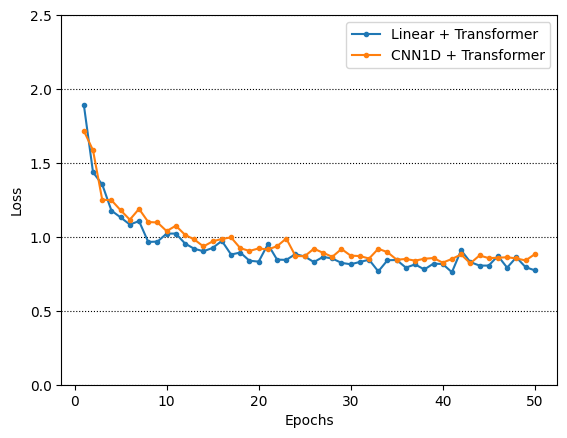

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_linear)+1)
plt.plot(xs, val_losses_linear, label="Linear + Transformer", marker=".")
plt.plot(xs, val_losses_cnn1d, label="CNN1D + Transformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

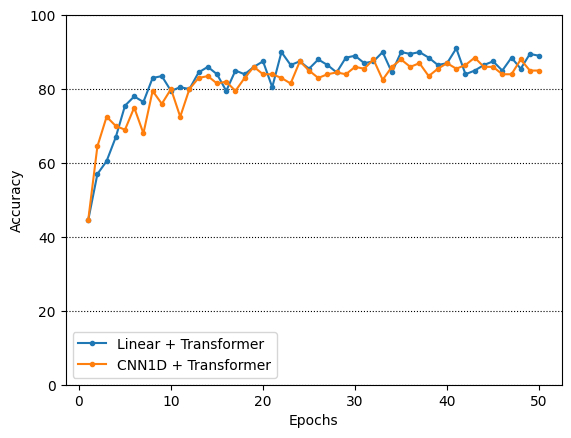

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_linear)+1)
plt.plot(xs, test_accs_linear, label="Linear + Transformer", marker=".")
plt.plot(xs, test_accs_cnn1d, label="CNN1D + Transformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()